In [5]:
!pip install -q tensorflow scikit-learn

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [18]:
%mkdir data
%cd data/
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

%cd ..

mkdir: data: File exists
/Users/tinapyp/Dev/Personal/python-fundamental/Challenges/FreeCodeCamp - Machine Learning with Python/health-cost-regression/data
--2024-09-01 21:06:21--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0.02s   

2024-09-01 21:06:21 (2.26 MB/s) - ‘insurance.csv.4’ saved [50264/50264]

/Users/tinapyp/Dev/Personal/python-fundamental/Challenges/FreeCodeCamp - Machine Learning with Python/health-cost-regression


In [104]:
# Import data
df = pd.read_csv('./data/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Data Preprocessing

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
## Fix some object Data
df['sex'] = df['sex'].map({'male': '1', 'female': '0'}).astype('int64')
df['smoker'] = df['smoker'].map({'yes': '1', 'no': '0'}).astype('int64')
df['region'] = df['region'].map({'southwest': '0', 'southeast': '1', 'northwest': '2', 'northeast': '3'}).astype('int64')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [108]:
# Split data into 80% into train 20% into test
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

In [109]:
# Define features and labels
train_labels = train_dataset[train_dataset.columns[-1]]
test_labels = test_dataset[test_dataset.columns[-1]]

train_dataset = train_dataset[train_dataset.columns[:-1]]
test_dataset = test_dataset[test_dataset.columns[:-1]]

In [110]:
# Normalize data
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_dataset))

# Model Training

In [111]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [112]:
model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (1070, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [113]:
model.fit(
    train_dataset,
    train_labels,
    epochs=100,
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 12939.9678 - mae: 12939.9678 - mse: 302404384.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 13647.9033 - mae: 13647.9033 - mse: 336875040.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 13592.4834 - mae: 13592.4834 - mse: 325301312.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 13180.9014 - mae: 13180.9014 - mse: 313644544.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 13552.4736 - mae: 13552.4736 - mse: 332406400.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 13107.2822 - mae: 13107.2822 - mse: 315412288.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 13580.9043 - mae: 13580.9043 - mse: 336288384.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 13274.7480 - mae: 13274.7480 - mse: 324794688.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 13318.6514 - mae: 13318.6514 - mse: 3275396

# Testing

9/9 - 0s - 6ms/step - loss: 2949.4460 - mae: 2949.4460 - mse: 33720668.0000
Testing set Mean Abs Error: 2949.45 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


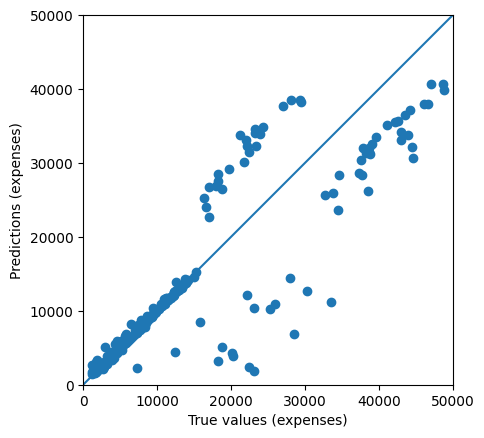

In [114]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
